# Введение в машинное обучение для Java-разработчиков
### Практическое задание 3. Нейронные сети.
### Дата выдачи: 2.11.2023

### Дедлайн: 23:59MSK 23.11.2023

## О задании
В этом задании мы попытаемся разобраться в устройстве двухслойной нейронной сети.

## Оценивание и штрафы
См. оценки в следующей ячейке

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов, что автоматически ведет к несдаче курса. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в комментариях. 
В данном задании есть необязательные бонусные задания, выполнение которых добавляет баллы в карму :)

## Формат сдачи
Задания сдаются путем форка основного репозитория, коммита решения в мастер-ветку вашего форка и оповещении преподавателя о выполнении ДЗ. 

## Часть 1. Двухслойная нейронная сеть для задачи бинарной классификации.

На первом слое используюйте функцию активации ReLU, на выходном - sigmoid

##### На оценку "удовлетворительно" необходимо реализовать следующие функции:

- [task] - функция активации ReLU
- [task] - функция активации Sigmoid
- [task] - функция бинарной кросс-энтропи

  
#####  На оценку "хорошо" необходимо реализовать следующие функции:
- [task] - реализуйте функцию прямого прохода сети

#####  На оценку "отлично" необходимо реализовать следующие функции:
 - [task] - реализуйте функцию обратного прохода сети. Необходимо реализовать расчет градиентов для всех весов (легче всего это сделать в матричной форме), используя свойства расчета производной от сложной функции.
 - [task] - реализуйте обучение нейронной сети. Сделайте цикл по "эпохам", а рамках эпохи перебирайте последовательно все объекты обучающей выборки. Далее на каждом объекте считайте функцию потерь и градиенты.

In [11]:
import numpy as np

class TwoLayerNeuralNetwork:
    def __init__(self, input_size=2, hidden_size=2, output_size=1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def ReLU(x):
        return np.maximum(0, x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def binary_cross_entropy_loss(self, y_true, y_pred):
         return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def forward(self, X):

    # Forward pass through the first layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.ReLU(self.z1)
        # Forward pass through the second layer
    
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2


    def backward(self, X, y, learning_rate=0.1):
    
        # Backward pass through the second layer
    
        da2 = -y / self.a2 + (1 - y) / (1 - self.a2)
        dW2 = np.dot(self.a1.T, da2) / X.shape[0]
        db2 = np.sum(da2, axis=0) / X.shape[0]
    
    
        # Backward pass through the first layer
        da1 = np.dot(da2, self.W2.T) * (self.a1 > 0)
        dW1 = np.dot(X.T, da1) / X.shape[0]
        db1 = np.sum(da1, axis=0) / X.shape[0]
    
    
        # Update the parameters
    
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    
    
    def fit(self, X, y, num_epochs=100, learning_rate=0.1):
        for _ in range(num_epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)

## Часть 2. Двухслойная нейронная сеть 

Попробуйте обучить реализацию вашей сети на небольшом синтетическом датасете.

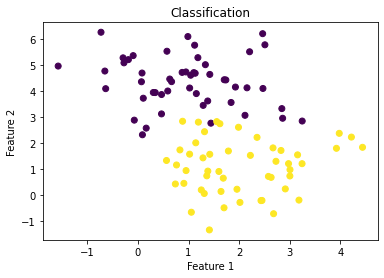

TypeError: ReLU() takes 1 positional argument but 2 were given

In [12]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Сlassification")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = TwoLayerNeuralNetwork(2, 5, 1)
# Train the neural network
model.fit(X_train, y_train, num_epochs=1000, learning_rate=0.1)

# Make predictions on the test set
y_pred = np.round(model.forward(X_test))
